In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [17]:
class CouponCollector():
    
    def __init__(self, N=100):  
        self.N = N
        self.collection = [False for i in range(N)]
        self.iter = 0

    def sample(self):
        s = np.random.randint(self.N)
        self.collection[s] = self.collection[s] or True
        self.iter += 1

    def count(self):
        return np.sum(self.collection)

    def countPr(self):
        return self.count() / self.N




In [18]:
# Collection sizes
Collections = [10, 30, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Number of trials for each case
N = 100

# Save the results
R = np.zeros((len(Collections), N))

i = 0

for c in Collections:
    print("Tamaño:", c)
    for n in range(N):
        collector = CouponCollector(c)
        while collector.countPr() != 1.0:
            collector.sample()
        R[i, n] = collector.iter
    i += 1
    

Tamaño: 10
Tamaño: 30
Tamaño: 50
Tamaño: 100
Tamaño: 150
Tamaño: 200
Tamaño: 300
Tamaño: 400
Tamaño: 500
Tamaño: 600
Tamaño: 700
Tamaño: 800
Tamaño: 900
Tamaño: 1000


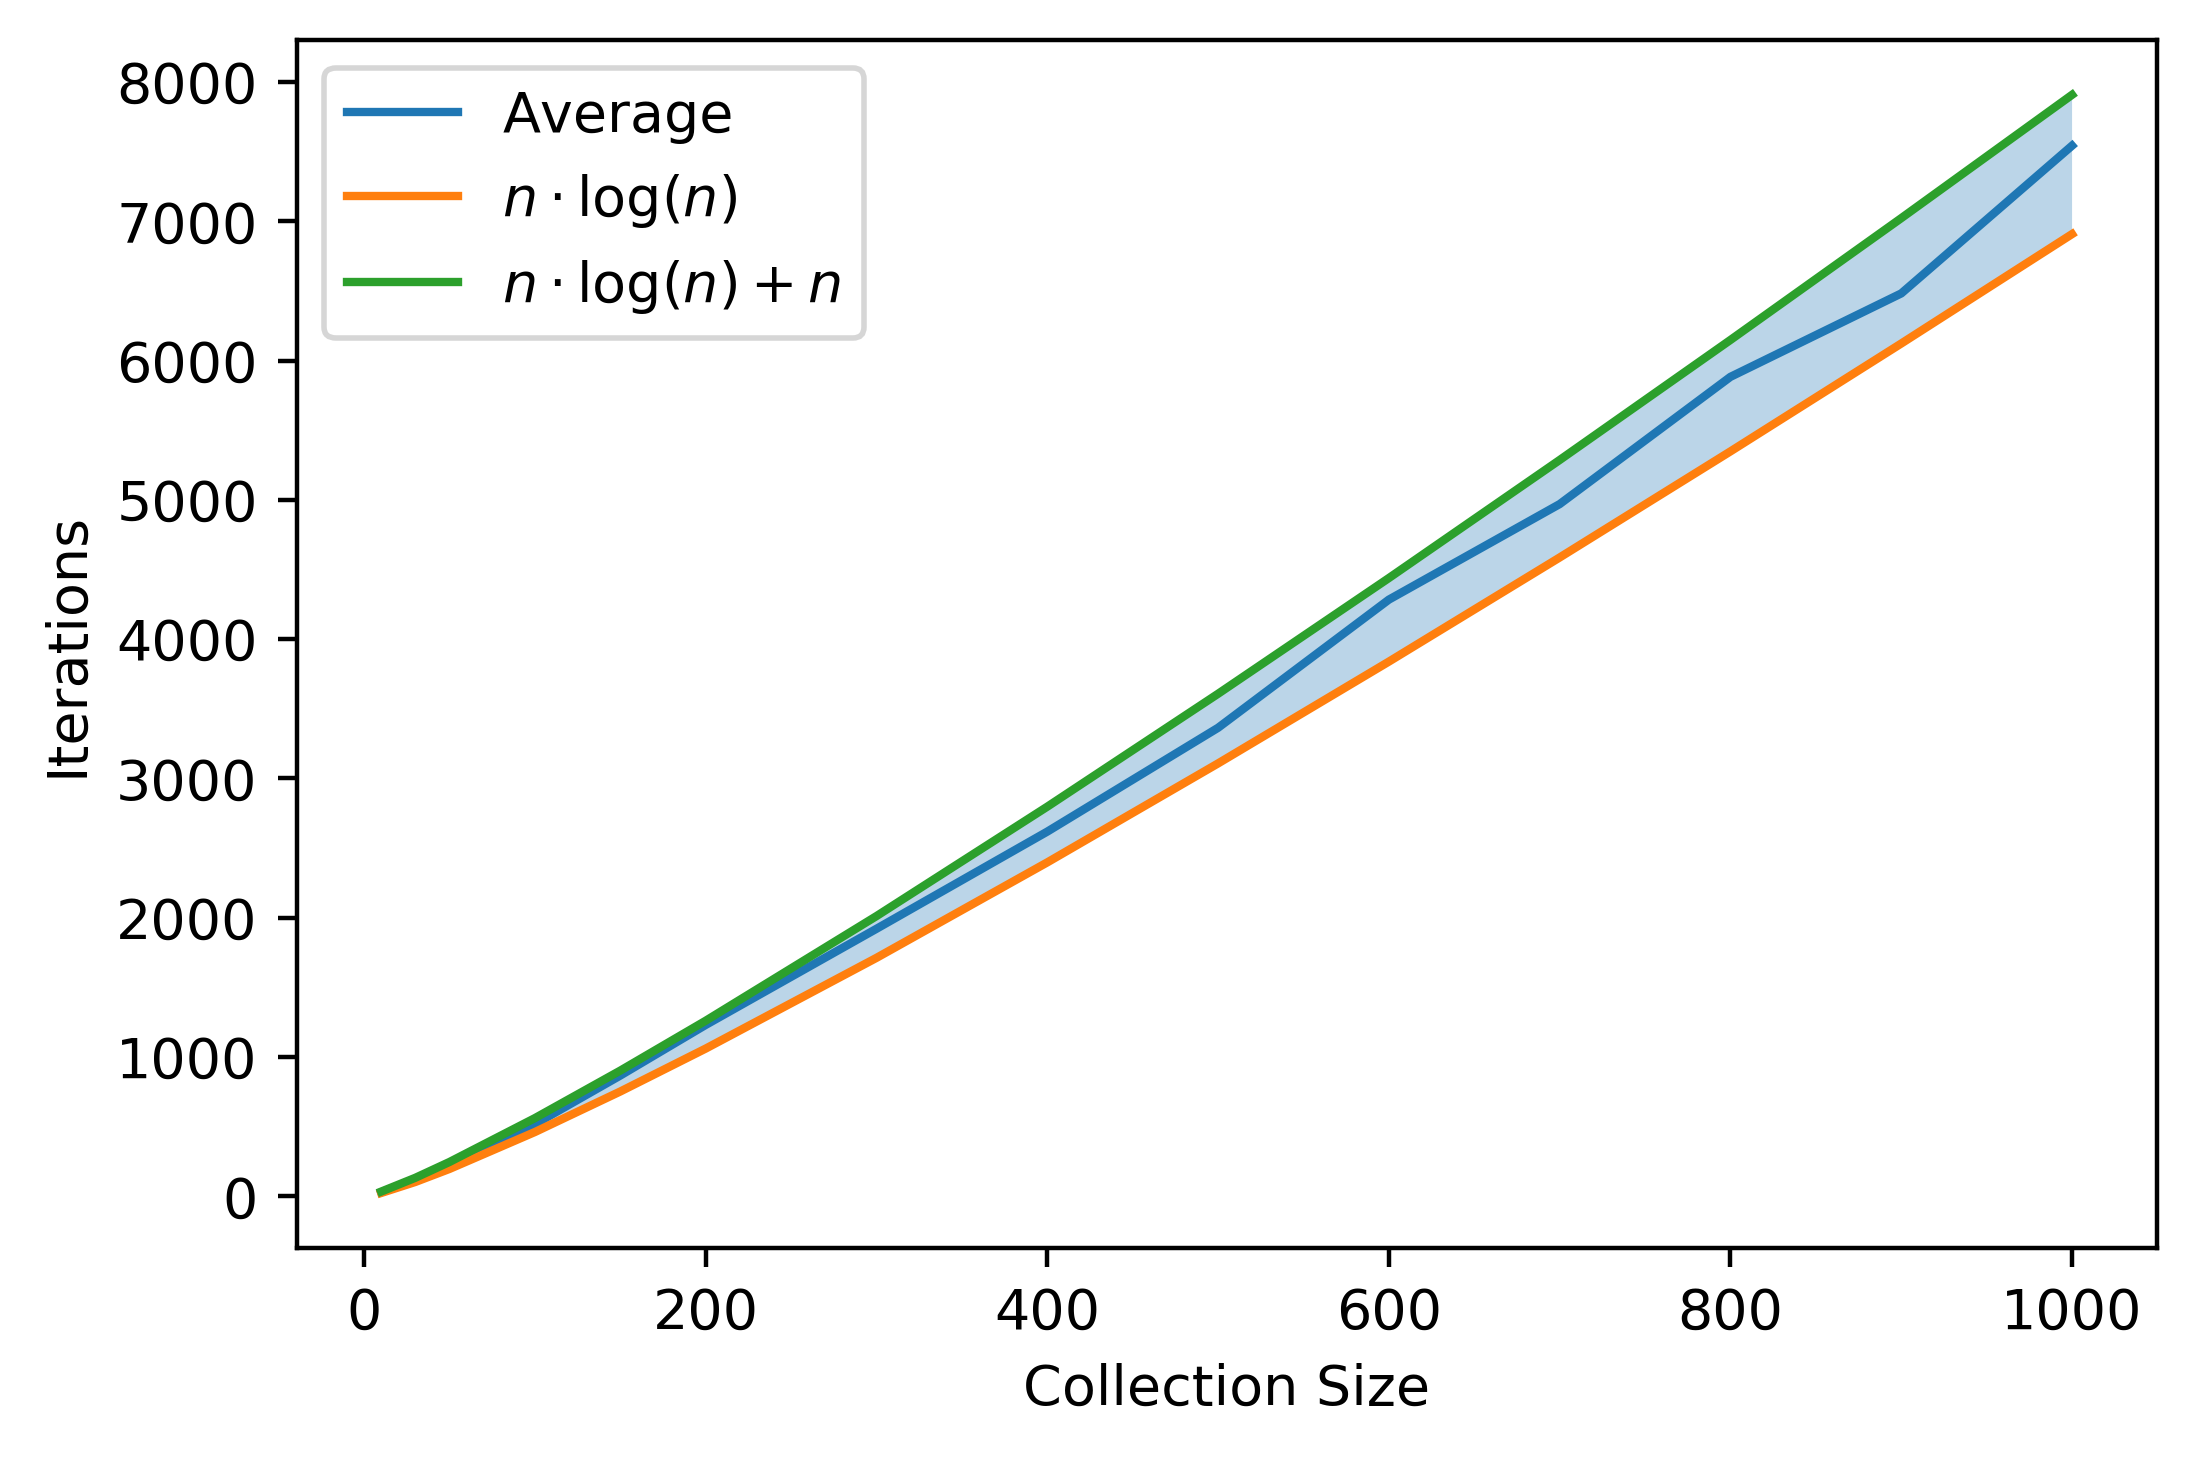

In [22]:
plt.figure(dpi=200)
#ax = fig.add_subplot(2, 1, 1)
plt.plot(Collections, np.mean(R, 1), label="Average")
plt.plot(Collections, [n * np.log(n) for n in Collections], label="$n\cdot \log(n)$")
plt.plot(Collections, [n * np.log(n)+ n for n in Collections], label="$n\cdot \log(n)+ n$")
plt.fill_between(Collections,
                 [n * np.log(n) for n in Collections],
                 [n * np.log(n) + n for n in Collections],
                 alpha=0.3,
                 )
plt.xlabel("Collection Size")
plt.ylabel("Iterations")
#plt.xscale("log")

plt.legend()

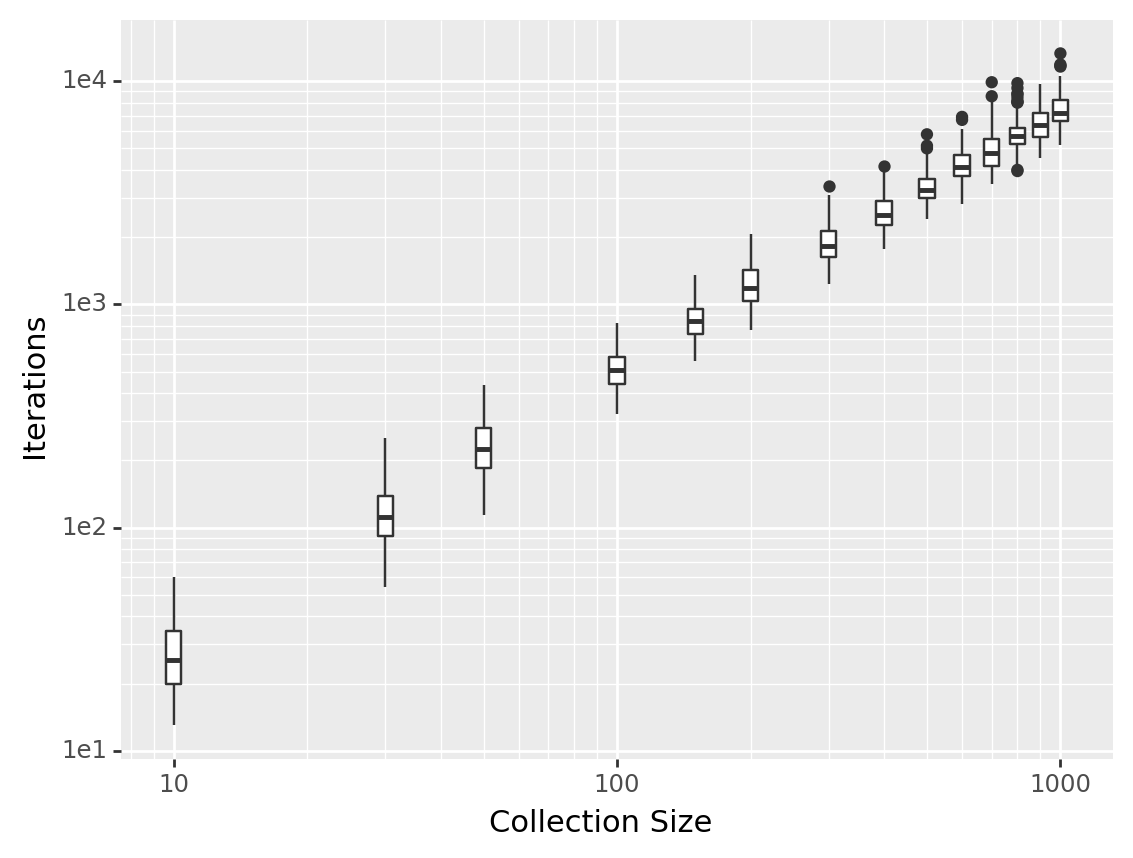

<ggplot: (-9223371950447089252)>

In [20]:
df = pd.DataFrame(data=R.T, columns=[i for i in Collections])
df2 = pd.melt(df, var_name="Collection Size", value_name="Iterations")
p = ggplot(aes("Collection Size", "Iterations", group="Collection Size"), data=df2) + geom_boxplot() + scale_x_log10() + scale_y_log10()
p

C:\Users\Robotica_2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


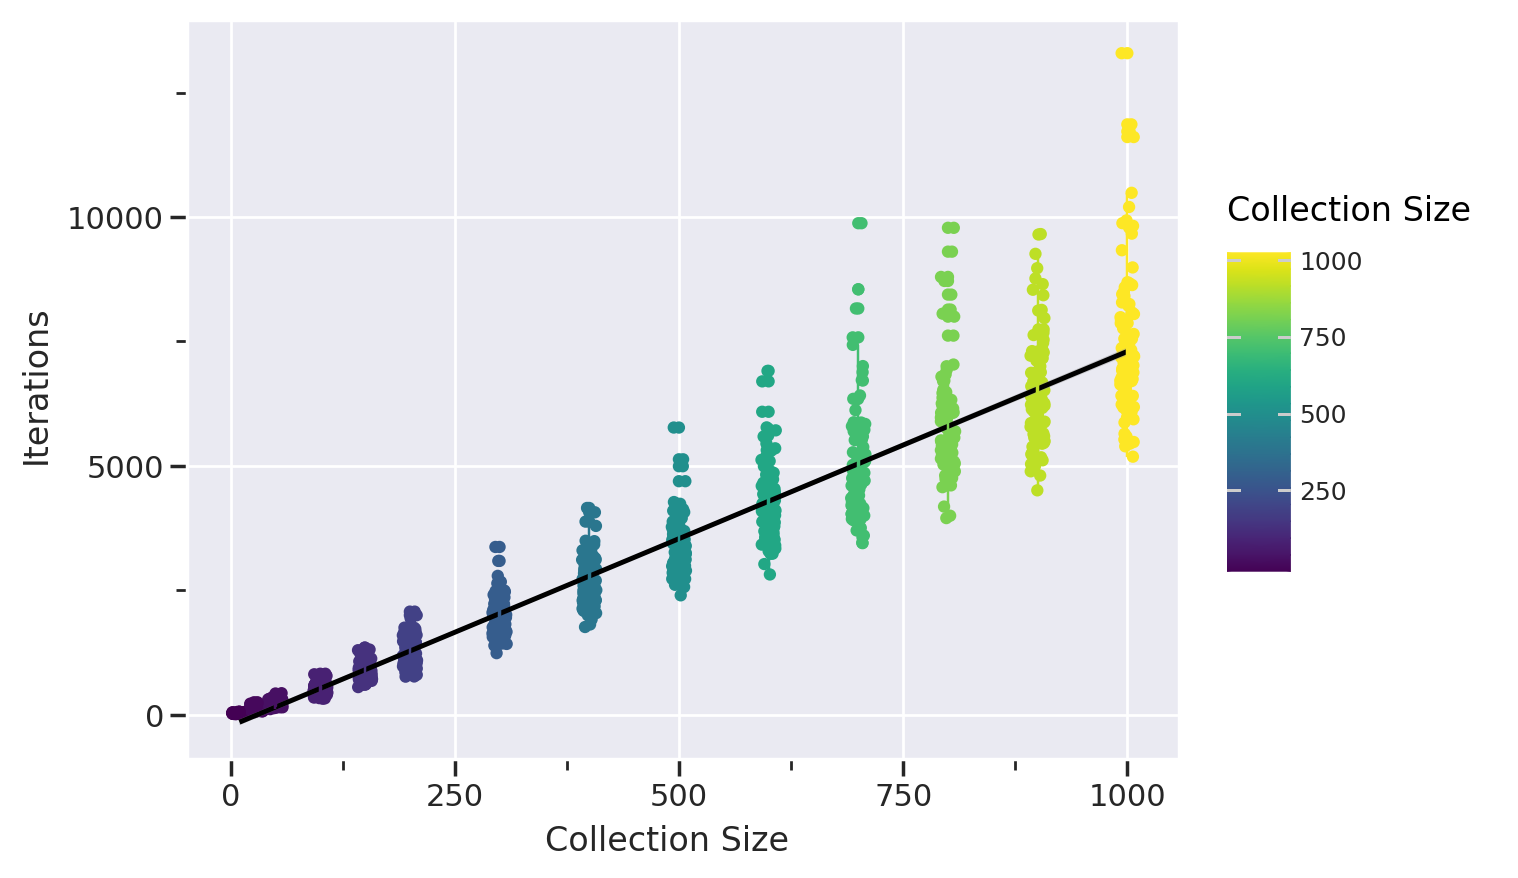

<ggplot: (-9223371950446561744)>

In [23]:
ggplot(aes("Collection Size", "Iterations", color="Collection Size"), data=df2) +\
        geom_jitter(width=8) + geom_smooth() +\
        geom_boxplot(aes(group="Collection Size")) +\
        theme_seaborn()